In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model

data= pd.read_csv("./data/torvet_Benzin.csv",sep=";")
data= data.drop(['link','location'], axis=1)
print(data)
for index in data.index:
    data.loc[index, 'km']=data.loc[index, 'km'].replace('.','')
    if(data.loc[index, 'km'].isdigit()):
        data.loc[index, 'km']=float(data.loc[index, 'km'])
    else:
        data.loc[index, 'km']=None
    
    if "Audi" not in data.loc[index,'model']:
        data.loc[index,'model']=None
    else:
        data.loc[index,'model']=data.loc[index,'model'].replace('Audi','').strip()
    
#--- this code is just for information purpose ---

#bool_matrix=data.isnull();
#only_null_filter = bool_matrix.any(axis=1)
#missing = data[only_null_filter]
#print(missing.info)
#print()
#print(data.info)
#---  end ---

data.dropna(inplace=True)
#print(data.info)



    

        

#data.head()

       model                                   type   price       km  year
0    Audi Q2                          30 TFSi Sport  275900    6.000  2020
1    Audi Q2                       30 TFSi Prestige  282900    4.000  2021
2    Audi A3                       35 TFSi Prestige  329900   10.000  2021
3    Audi Q2                       30 TFSi Prestige  284900    6.000  2021
4    Audi A1                      30 TFSi Sportback  274900    4.000  2020
..       ...                                    ...     ...      ...   ...
942  Audi A1  1,4 TFSi 185 Ambition Sportback S-tr.  174900   99.000  2013
943  Audi A5     2,0 TFSi 190 Sport Sportback S-tr.  360000   78.000  2017
944  Audi A1     1,4 TFSi 185 Ambition S-line S-tr.  159999  134.000  2013
945  Audi A1  1,4 TFSi 122 Ambition Sportback S-tr.  149900   99.000  2014
946  Audi A3  1,8 TFSi 180 Ambiente Sportback S-tr.  197900   87.000  2015

[947 rows x 5 columns]


In [16]:
data['type'][100:150]

100                     40 TFSi Advanced S-tr.
101                     35 TFSi Advanced S-tr.
102                     35 TFSi Prestige S-tr.
103                     35 TFSi Prestige S-tr.
104               4,0 TFSi Avant quattro S-tr.
105                    35 TFSi Sportback S-tr.
106           35 TFSi Prestige Sportback S-tr.
107                     35 TFSi Prestige S-tr.
108                     35 TFSi Prestige S-tr.
109                     35 TFSi Advanced S-tr.
110           40 TFSi Advanced Sportback S-tr.
111          40 TFSi Prestige+ Sportback S-tr.
112          40 TFSi Prestige+ Sportback S-tr.
113                     35 TFSi Prestige S-tr.
114                     35 TFSi Prestige S-tr.
115            40 TFSi S-line+ Sportback S-tr.
116              4,0 TFSi Avant quattro Tiptr.
117    40 TFSi Limited+ Sportback quattro S-tr
118             35 TFSi S-line Sportback S-tr.
119     35 TFSi Sport Limited+ Sportback S-tr.
120                     40 TFSi Advanced S-tr.
121          

In [19]:

typ=data['type']
capacity=[]
count=0
for t in list(typ):
    
    a=t.split('TFSi')
    if(len(a)==2):
        capacity.append(a[0].strip())
    else:
        b=a[0].split(' ')
        capacity.append(b[0])
    
    if (capacity[count]== None or len(capacity[count])>3):
        #print(t)
        c=t.replace("Sportback","").replace("Lang","").replace("Avant","").replace("Roadster","").replace("Spyder","").strip()
        c=c.split(" ")
       
        c=c[0]
        capacity[count]=c
        #print(capacity[count])
        
    count+=1
    
data['capacity']=capacity    
data= data.drop(['type'], axis=1)

print('LENGTH: ',len(data))


data.loc[14:30]
  

LENGTH:  933


,model,price,km,year,capacity
14,A3,209900,92000,2017,"1,0"
15,SQ5,769900,62000,2018,"3,0"
16,A3,282900,6000,2021,30
17,A3,409900,8000,2021,35
18,A3,399900,5000,2021,35
19,S3,724900,6000,2021,"2,0"
20,A3,379900,6000,2021,35
21,A3,389900,4000,2021,35
22,A3,389900,11000,2021,35
23,A3,389900,9000,2021,35


In [18]:
for index in data.index:
    for col in data.columns:
        if(data.loc[index,col]=='-'):
            data.loc[index,col]=None
data.dropna(inplace=True)

print("LENGTH: ", len(data))
        

LENGTH:  933


In [71]:
data=data.drop_duplicates()
len(data)

916

In [72]:

uniqe_models=np.unique(data['model'])
#len(uniqe_models)

uniqe_capas=np.unique(data['capacity'])
#en(uniqe_capas)

In [73]:
import pandas as pd

#create a new dataframe for each model
df_by_model={}
for model in uniqe_models:
    df_by_model[model]=pd.DataFrame(columns=data.columns)
    df_by_model[model]=df_by_model[model].append(data[data['model']==model])
    df_by_model[model]=df_by_model[model].reset_index()
    df_by_model[model]=df_by_model[model].drop('index', axis=1)

df_by_model['A1'].head()

,model,type,price,km,year,capacity
0,A1,30 TFSi Sportback,274900,4000,2020,30
1,A1,35 TFSi Sportback S-tr.,259900,64000,2019,35
2,A1,30 TFSi Advanced Sportback S-tr.,289900,4000,2021,30
3,A1,30 TFSi Advanced Sportback S-tr.,295900,4000,2021,30
4,A1,30 TFSi Advanced Sportback S-tr.,289900,6000,2021,30


In [5]:
def plot_price_by_year(tmp, model):
    fig = plt.figure()

    ax = fig.add_subplot(111)

    plt.ylabel('price')
    plt.xlabel('year')

    #tmp=df_by_model['A1']
    for c in np.unique(tmp['capacity']):
        data_by_capa=tmp[tmp['capacity']==c]
        y=data_by_capa['price']
        x=data_by_capa['year']
        plt.scatter(x,y,label=c)
        plt.suptitle(model)
        #plt.xlim([1990, 2020])
        #plt.ylim([5000,50000])

        plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


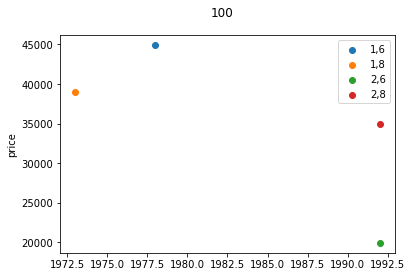

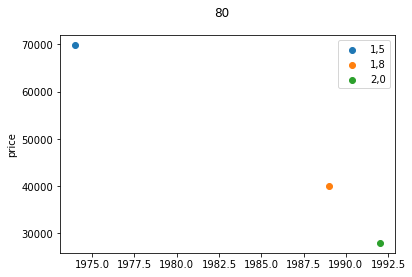

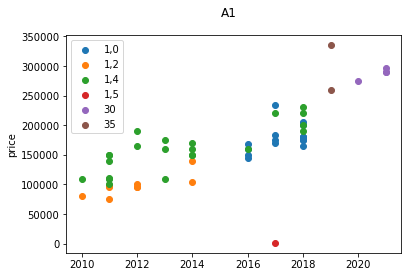

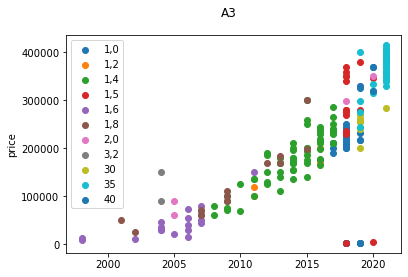

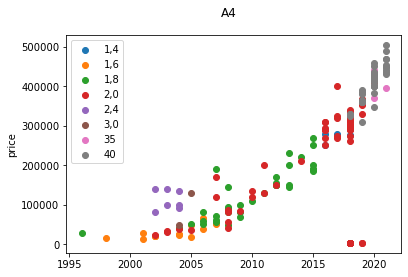

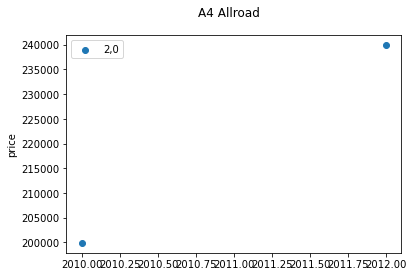

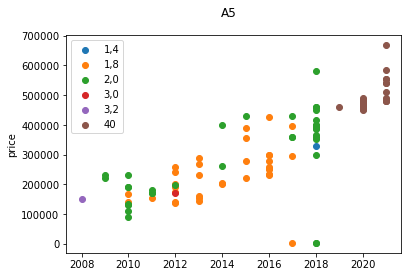

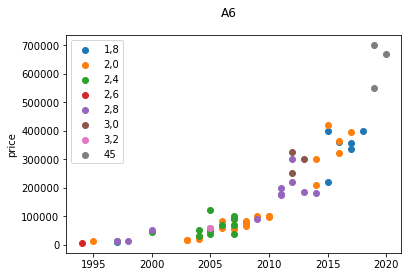

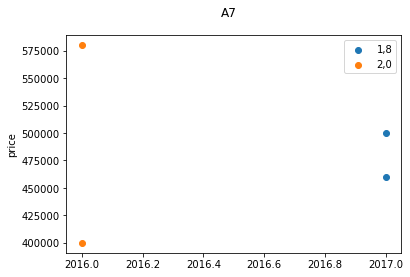

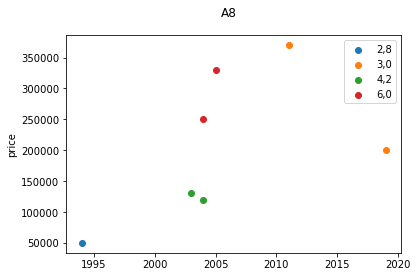

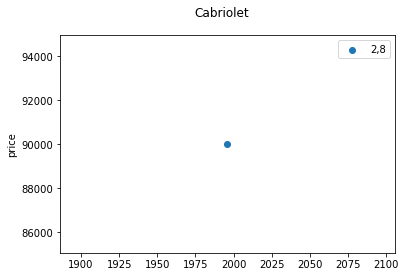

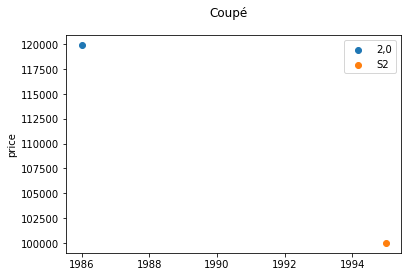

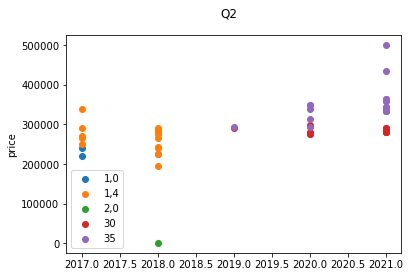

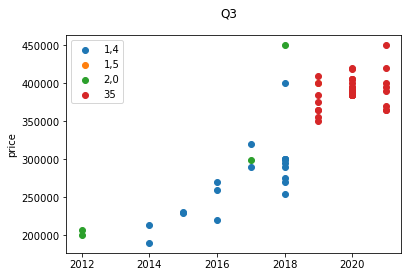

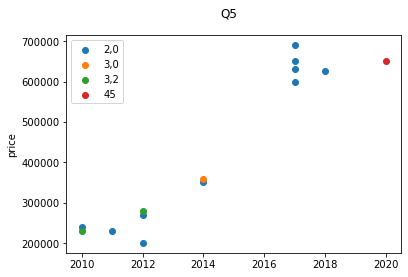

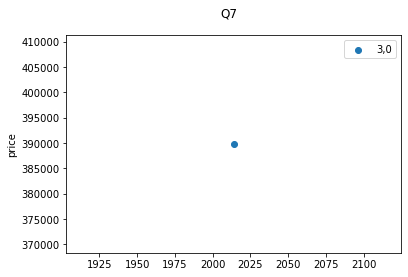

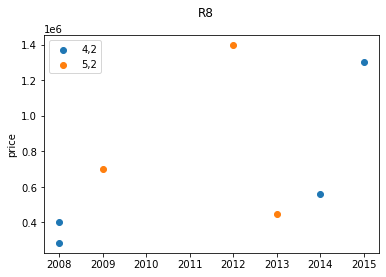

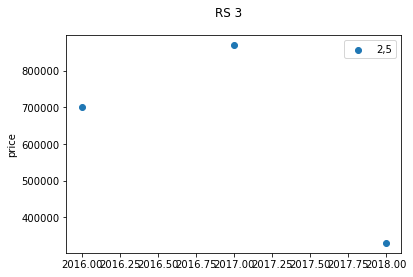

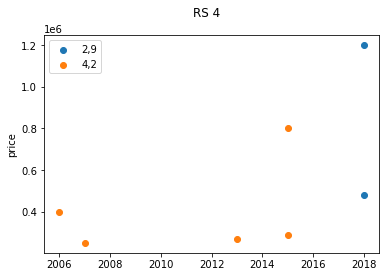

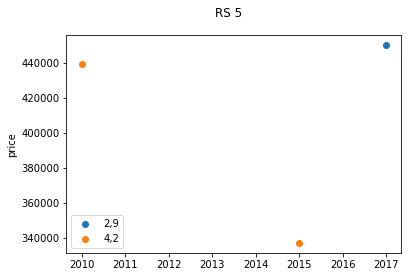

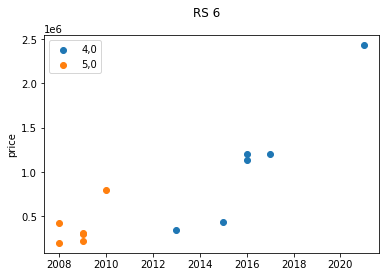

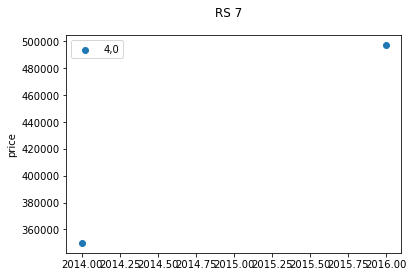

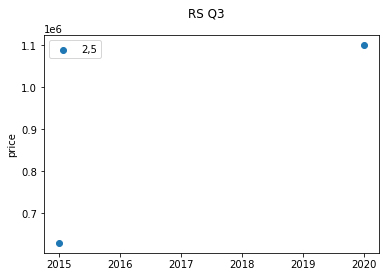

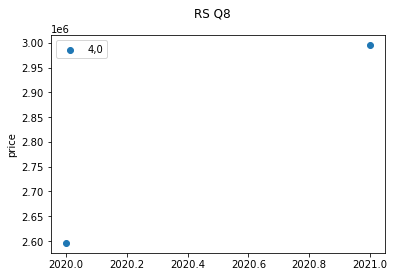

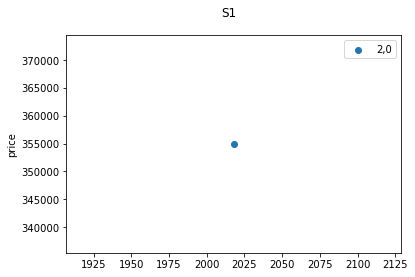

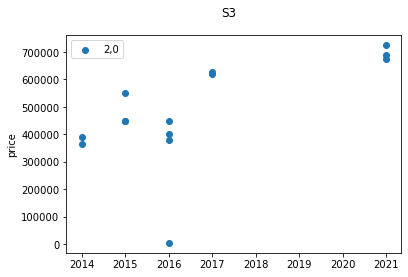

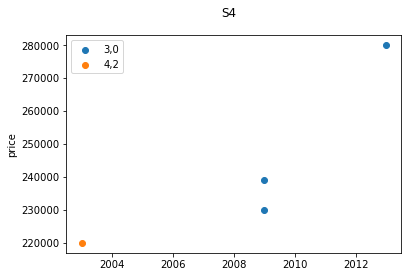

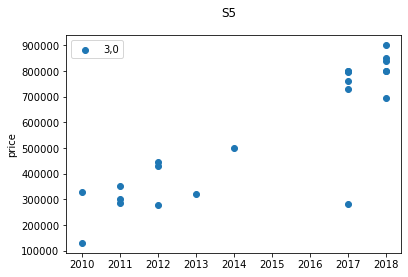

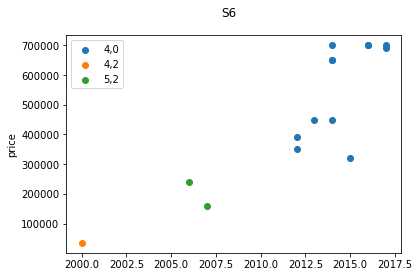

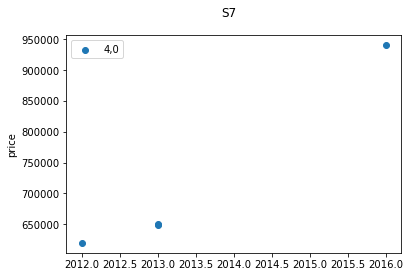

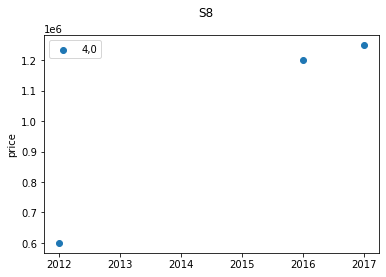

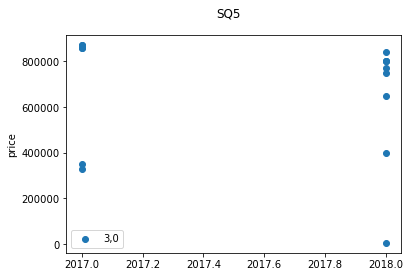

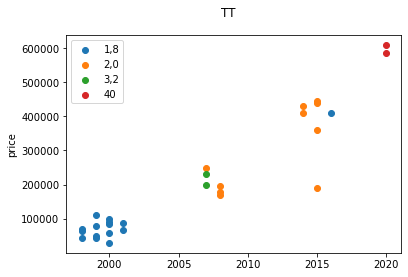

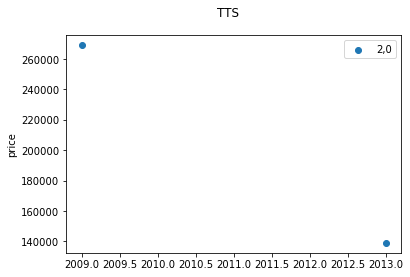

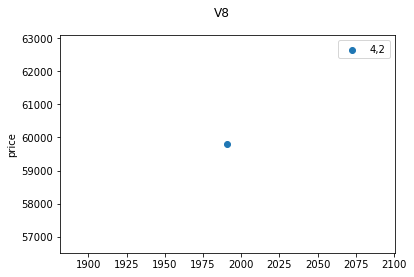

In [29]:
for k in df_by_model.keys():
    plot_price_by_year(df_by_model[k],k)

In [75]:
tmp=df_by_model['A1']

reg = linear_model.LinearRegression()
xs=tmp['year']

ys=tmp['price']
xs_reshape=np.array(xs).reshape(-1,1)

In [76]:
'''
print(xs.shape)
print(xs_reshape.shape)
print(xs_reshape)
'''

(55,)
(55, 1)
[[2020]
 [2019]
 [2021]
 [2021]
 [2021]
 [2010]
 [2017]
 [2013]
 [2017]
 [2016]
 [2011]
 [2018]
 [2018]
 [2018]
 [2018]
 [2016]
 [2018]
 [2016]
 [2014]
 [2014]
 [2018]
 [2011]
 [2012]
 [2011]
 [2014]
 [2011]
 [2018]
 [2018]
 [2016]
 [2018]
 [2017]
 [2010]
 [2012]
 [2016]
 [2011]
 [2012]
 [2014]
 [2019]
 [2012]
 [2017]
 [2011]
 [2018]
 [2018]
 [2018]
 [2018]
 [2014]
 [2011]
 [2017]
 [2012]
 [2011]
 [2011]
 [2017]
 [2013]
 [2013]
 [2014]]


0     2020
1     2019
2     2021
3     2021
4     2021
5     2010
6     2017
7     2013
8     2017
9     2016
10    2011
11    2018
12    2018
13    2018
14    2018
15    2016
16    2018
17    2016
18    2014
19    2014
20    2018
21    2011
22    2012
23    2011
24    2014
25    2011
26    2018
27    2018
28    2016
29    2018
30    2017
31    2010
32    2012
33    2016
34    2011
35    2012
36    2014
37    2019
38    2012
39    2017
40    2011
41    2018
42    2018
43    2018
44    2018
45    2014
46    2011
47    2017
48    2012
49    2011
50    2011
51    2017
52    2013
53    2013
54    2014
Name: year, dtype: object

In [77]:
reg=linear_model.LinearRegression()
reg.fit(xs_reshape,ys)
print(reg.coef_)
print(reg.intercept_)

[14349.05769231]
-28750197.519230753


In [78]:
predicted=reg.predict(xs_reshape)
year2019=reg.predict([[2019]])
year2019

array([220549.96153846])

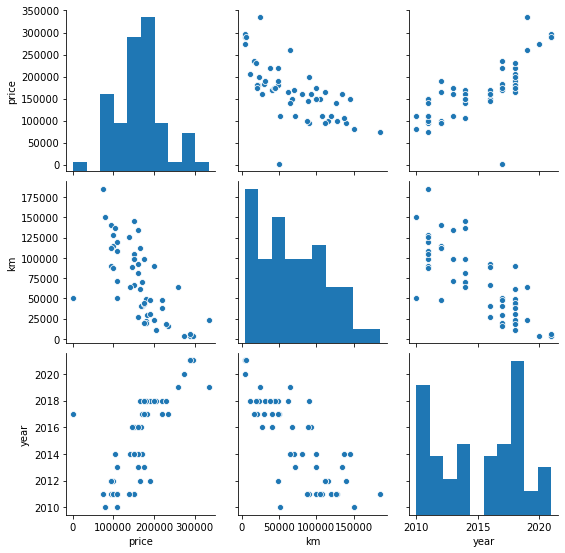

In [79]:
import seaborn as sb
sb.pairplot(tmp)